# Baseball Case Study

#### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Uploading Data

In [77]:
ball =pd.read_csv('baseball.csv')
# Reading first 5 rows
ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [78]:
# checking the columns
ball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#####  Input features:
Runs - R 
At Bats - AB 
Hits - H
Doubles - 2B 
Triples - 3B
Homeruns - HR
Walks - BB
Strikeouts - SO 
Stolen Bases - SB
Runs Allowed - RA
Earned Runs - ER
Earned Run Average - ERA 
Shutouts - SHO
Saves - SV
Error - E
##### Output feature:
Number of predicted wins (W)

In [79]:
# Let's check number of rows and columns in our data
print("We have rows --> {}  \nand columns --> {} \nin our dataset.".format((len(ball)),(len(ball.columns))))

We have rows --> 30  
and columns --> 17 
in our dataset.


In [80]:
# Let's check the data type
ball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

###### Our dataset contains  integer and float type of dataset.

In [81]:
# Let's check full information about our data
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


###### So this dataset is with 30 rows and 17 columns with 1-float and 16-integer data types.

In [82]:
# Checking null values

if ball.isnull().sum().any()==True:
    print("Null values present in dataset")
else:
    print("There is no null values in dataset")

There is no null values in dataset


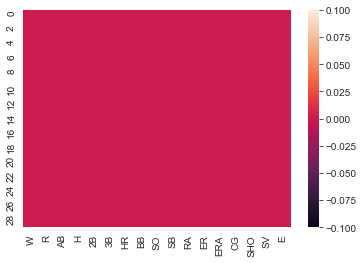

In [83]:
# checking null values using heatmap
sns.heatmap(ball.isnull())

###### No Null values in our  dataset.

In [84]:
# Let's check the duplicate values in data
if ball.duplicated().sum().any()==True:
    print("Our data contains duplicate values")
else:
    print("There are no duplicate values in our data")

There are no duplicate values in our data


In [85]:
# Let's check features description
ball.describe()    

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


##### Key Observations:-
1. Except SB ,all other columns have difference in their mean and median values.
2. Many columns have too much difference in their 75th percentile and 100th percentile.Like in `R`,`HR` etc.
3. Difference in mean and median shows presence of skewness in data and difference of percentiles confirms that there are outliers also.

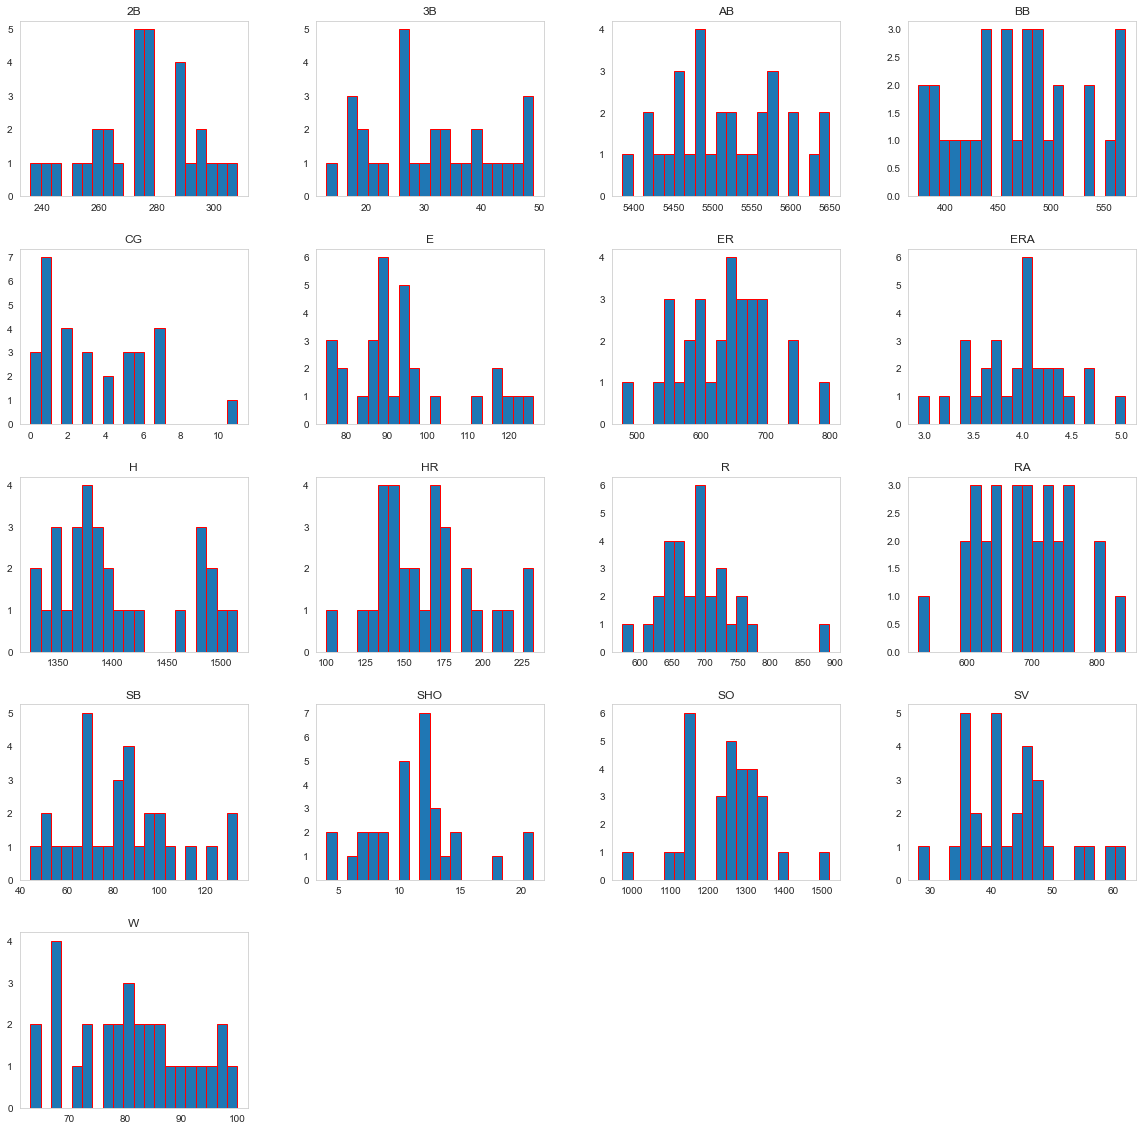

In [86]:
ball.hist(bins=20,edgecolor='red',grid=False,linewidth= 1.0,layout=(5,4),figsize=(20,20))
plt.show()

###### These graphs shows that the data is not uniformly distributed as our data is also integer type of data.

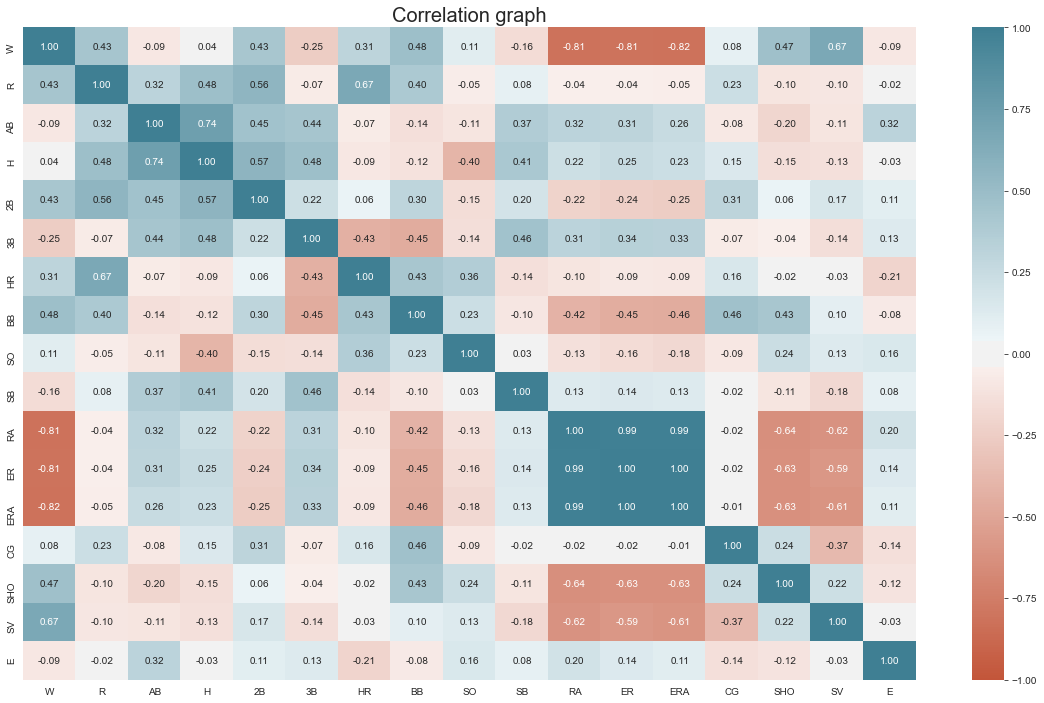

In [87]:
# Checking correlation
plt.figure(figsize=(20,12))
sns.heatmap(ball.corr(),annot=True,fmt=".2f",vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.title("Correlation graph",fontsize=20)
plt.show()

##### Key Observations:-
1. Target column is highly negatively correalted with columns `ERA,`ER`,`RA`.
2. Target column is sharing a positive correaltion with `SV` of 67%  correlation.
3. There is multicollinearity present in dataset as some columns are dependent on each other like `ERA,ER,RA,SV,SHO`.These all are sharing strong corrleation between them,

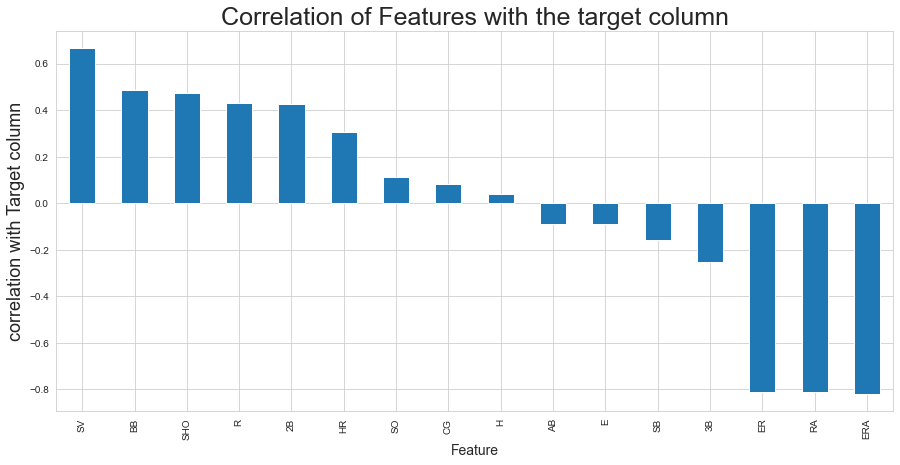

In [88]:
plt.figure(figsize=(15,7))
ball.corr()["W"].sort_values(ascending=False).drop(["W"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()

###### Here we can see that correaltion with target column and this indicates that there are columns which are more negatively correalted than positively correaltion.

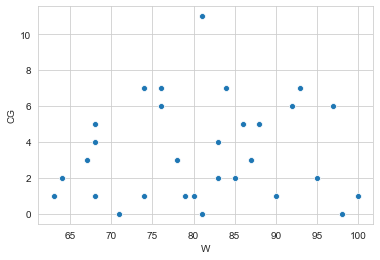

In [89]:
sns.scatterplot(x=ball.W,y=ball.CG)

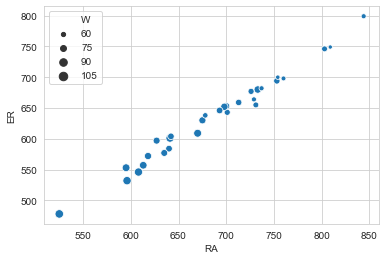

In [90]:
sns.scatterplot(x=ball.RA,y=ball.ER,size=ball.W)

##### We find that RA and ER are positively correalted and Target column is negatively correalted with them, as both of them increases then target column is decreasing.

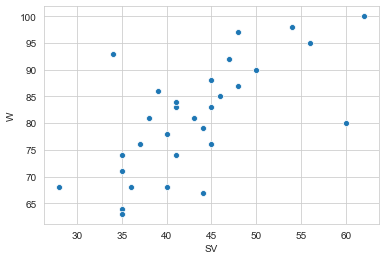

In [91]:
sns.scatterplot(x=ball.SV,y=ball.W)

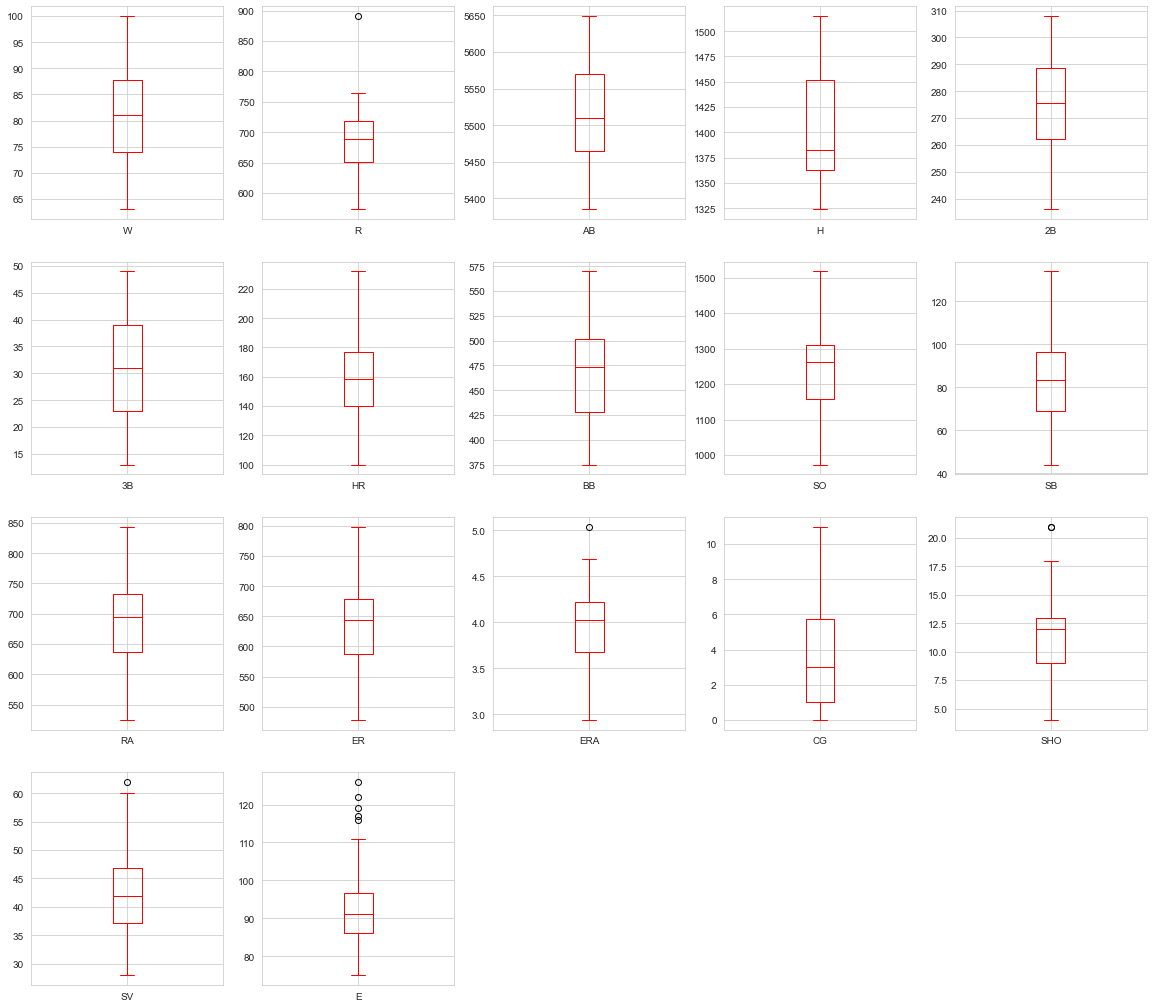

In [92]:
ball.plot(kind='box',layout=(4,5),figsize=(20,18),subplots=True,color='red')
plt.show()

###### Some columns contains high values but in column `E` some outliers present, but we are not removing outliers because it will lead to loss of data.

In [93]:
from scipy.stats import zscore
z=np.abs(zscore(ball))
ball=ball[(z<3).all(axis=1)]


In [94]:
ball.shape

(29, 17)

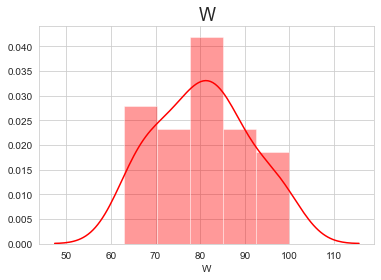

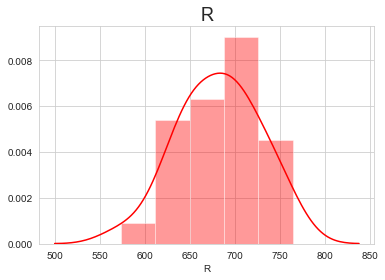

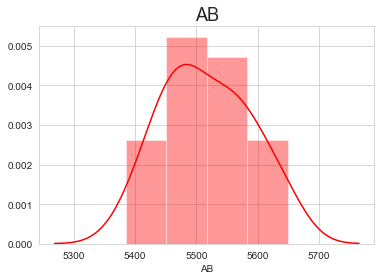

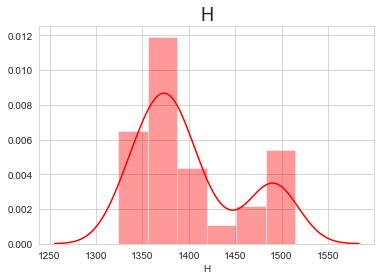

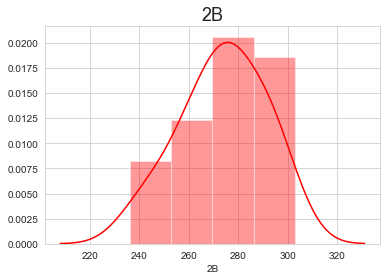

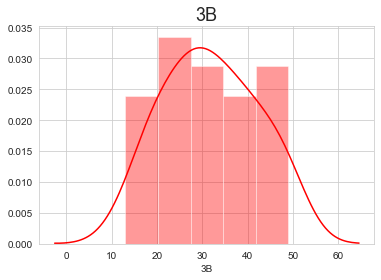

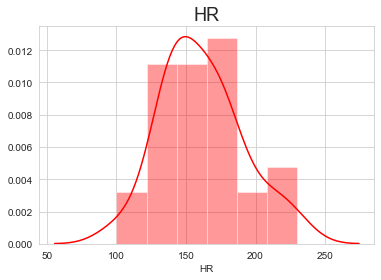

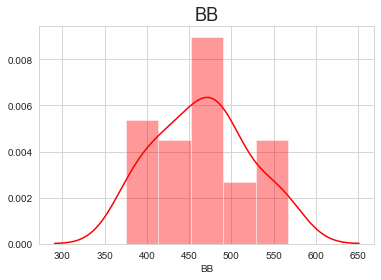

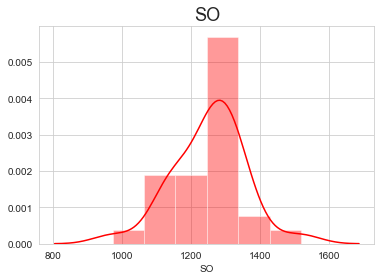

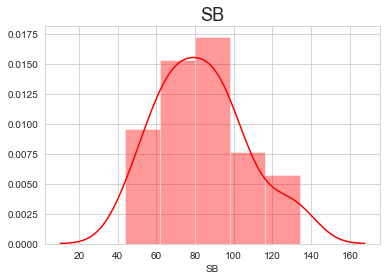

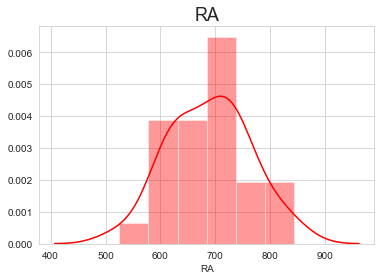

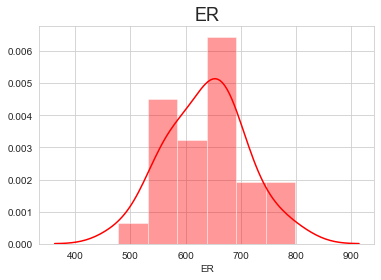

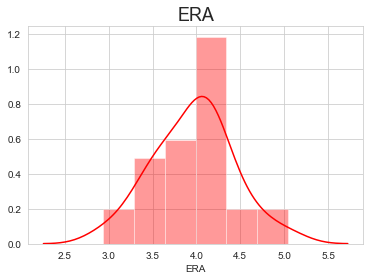

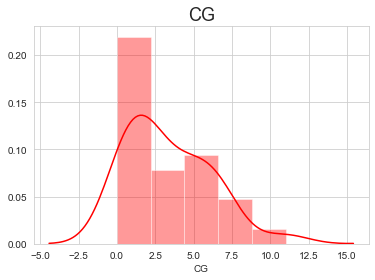

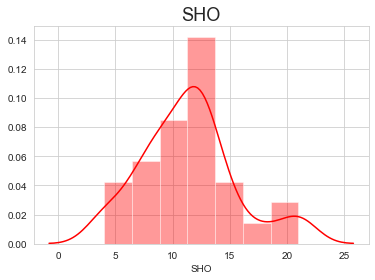

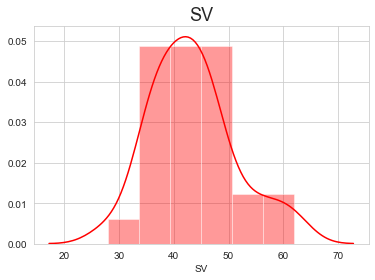

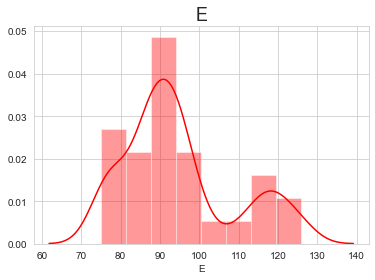

In [95]:
sns.set_style("whitegrid")
for i in ball.columns:
    plt.subplots()
    sns.distplot(ball[i],color='red')
    plt.title(i,fontsize=18)
    plt.show()

###### Some columns contains skewness like `R`,`E`. But there is no high degree of skewness in dataset.

In [96]:
ball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [97]:
# Removing skewness 
for index in ball.skew().index:
    if ball.skew().loc[index]>0.5:
        ball[index]=np.log1p(ball[index])
    if ball.skew().loc[index]<-0.5:
        ball[index]=np.square(ball[index])

### Splitting dependent and independent features

In [98]:
y=ball[['W']]
x=ball.drop(['W'],axis=1)

In [99]:
# checking the shape of splitted data
x.shape,y.shape

((29, 16), (29, 1))

In [100]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)

In [101]:
x=pd.DataFrame(X,columns=x.columns)

### Splitting data into training and testing

In [102]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [128]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((21, 16), (21, 1), (8, 16), (8, 1))

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [104]:
accu = 0
for i in range(0,700):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 89.53819109859424 found on randomstate 154


In [105]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [106]:
def models(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=19)
    # fitting model
    model.fit(x_train,y_train)
    #printing score of training
    model_name.append(model)
    print("Score ",model.score(x_train,y_train))
    score.append(model.score(x_train,y_train))
    # predicting 
    pred=model.predict(x_test)
    print('mean_squared_error',mean_squared_error(y_test,pred))
    mean_sq_error.append(mean_squared_error(y_test,pred))
    print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    # printing r2 score
    print("R2 score ",r2_score(y_test,pred))
    r2_Score.append((r2_score(y_test,pred)))
    

In [107]:
model_name=[]
score=[]
mean_sq_error=[]
rmse=[]
r2_Score=[]


In [108]:
lr=LinearRegression()
models(lr)

Score  0.9629700925445605
mean_squared_error 61.600410490891164
rmse 7.848592898787092
R2 score  0.38389962940818334


In [109]:
lasso=Lasso()
models(lasso)

Score  0.8738265135018367
mean_squared_error 16.24937401737857
rmse 4.031051229813207
R2 score  0.8374808662115598


In [110]:
ridge=Ridge()
models(ridge)

Score  0.9525636526641412
mean_squared_error 46.03808506932649
rmse 6.785137070783942
R2 score  0.5395472035572909


In [111]:
es=ElasticNet()
models(es)

Score  0.8574780252418058
mean_squared_error 30.52971952242948
rmse 5.52537053259141
R2 score  0.6946550946342418


In [112]:
svm=SVR()
models(svm)     

Score  0.19679133620835254
mean_squared_error 94.85594095439868
rmse 9.739401467975261
R2 score  0.05129235488646422


In [113]:
knn=KNeighborsRegressor()
models(knn)

Score  0.6022162312912522
mean_squared_error 51.91
rmse 7.204859471218019
R2 score  0.4808188779496797


In [114]:
dtr=DecisionTreeRegressor()
models(dtr)

Score  1.0
mean_squared_error 103.5
rmse 10.173494974687902
R2 score  -0.035161744022503605


In [115]:
rfr= RandomForestRegressor()
models(rfr)

Score  0.9232853328065447
mean_squared_error 45.58315
rmse 6.751529456352834
R2 score  0.5440972651976871


In [116]:
models=[LinearRegression(), Lasso(), Ridge(alpha=1, random_state=29), ElasticNet(), 
        SVR(), KNeighborsRegressor(), DecisionTreeRegressor(),
        RandomForestRegressor(random_state=29)]

In [117]:
mean_score=[]
STD=[]

for m in models:
    score=cross_val_score(m,x,y,cv=7,scoring='r2')
    print("Cross validation mean score of",m,"is ",score.mean())
    mean_score.append(score.mean())
    print("and standard deviation is ",score.std())
    STD.append(score.std())
    print(score)
    print("\n")

Cross validation mean score of LinearRegression() is  -0.3146652695611222
and standard deviation is  1.4280720428617375
[ 0.60400525 -2.40378203  0.50144631  0.42544193  0.55178901  0.83668978
 -2.71824713]


Cross validation mean score of Lasso() is  0.4220401250006577
and standard deviation is  0.6839557303679468
[ 0.73285466 -1.17843217  0.24894588  0.61100079  0.77240053  0.91263738
  0.85487381]


Cross validation mean score of Ridge(alpha=1, random_state=29) is  0.24162903699406016
and standard deviation is  0.850658490047391
[ 0.55897211 -1.75193092  0.10282803  0.43540559  0.78600165  0.94943192
  0.61069488]


Cross validation mean score of ElasticNet() is  0.40493827119354286
and standard deviation is  0.5166936815739848
[ 0.58015505 -0.66342295  0.0009229   0.46061316  0.71506289  0.85498996
  0.88624689]


Cross validation mean score of SVR() is  -0.24915916081814607
and standard deviation is  0.32712112278329886
[ 0.03042837 -0.02143502 -0.84875814 -0.57089193  0.14374097 

table=pd.DataFrame({'model':model_name,'Score':score,"r2_Score":r2_Score,"CV_mean":mean_score,"rmse":rmse})
table

#### So now we are getting 3 model with almost same results. But we are choosing `Lasso` algorithm for our model.

In [118]:
from sklearn.linear_model import LassoCV
alphas=np.random.uniform(low=0 ,high=10, size=(50,))
lasso_cv=LassoCV(alphas=alphas,cv=7,normalize=True)
lasso_cv.fit(x_train,y_train)

LassoCV(alphas=array([0.21967497, 3.31709306, 7.26875538, 9.18913563, 4.45468536,
       2.34851866, 4.88699862, 1.80376281, 0.99345691, 0.93788178,
       6.03154389, 9.11658884, 0.72644851, 7.27734479, 8.29077799,
       8.54249602, 6.90934063, 6.1598489 , 9.20689011, 7.40990999,
       7.4324104 , 9.64550392, 6.40602493, 9.78253116, 9.34794725,
       4.78525484, 5.644002  , 1.68873368, 5.27888502, 3.975631  ,
       8.0686073 , 5.94217927, 1.65892981, 3.10958302, 8.3155814 ,
       5.47332315, 5.4076874 , 0.22999726, 6.51956514, 5.49171763,
       8.44562092, 6.54721271, 4.23809587, 0.76350269, 1.87146793,
       3.50684573, 7.38009957, 5.42299274, 7.10833368, 7.43317437]),
        cv=7, normalize=True)

In [119]:
lasso_cv.alpha_

0.21967496646302376

In [120]:
lasso_model=Lasso(alpha=lasso_cv.alpha_)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.21967496646302376)

In [121]:
lasso_model.score(x_test,y_test)

0.769705970590925

In [122]:
pred=lasso_model.predict(x_test)
r2_score(y_test,pred)

0.769705970590925

##### So we are getting same score and r2 score .It means there is no underfitting and overfitting in our model.

### Saving model

In [123]:
import joblib
filename="lassoregression.obj"
joblib.dump(lasso_model,filename)

['lassoregression.obj']

In [124]:
### Loading model
model =joblib.load(filename)
model

Lasso(alpha=0.21967496646302376)

In [125]:
model.predict(x_test)

array([87.78213311, 69.41121205, 74.83045915, 98.65893914, 77.61018514,
       67.23973531, 72.64444088, 74.82963329])

### We are not getting better results because our dataset is not good. It should conatins at least 5 times greater data than the number of features present in dataset. So our data is not fitting well and may give improper results.